In [21]:
import pygame as pygame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [22]:
data = []
cluster = []

pygame.init() 
sc = pygame.display.set_mode((600, 400)) 
sc.fill((255, 255, 255)) 
pygame.display.update() 
 
clock = pygame.time.Clock() 
FPS = 60 
 
flag = True
while flag: 
    for i in pygame.event.get(): 
        if i.type == pygame.QUIT: 
            pygame.quit() 
            flag = False
        if i.type == pygame.MOUSEBUTTONDOWN: 
# левая
            if i.button == 1:
                data.append([i.pos[0], i.pos[1]])
                cluster.append(1)
                pygame.draw.circle(sc, (225, 0, 50), i.pos, 10) 
                pygame.display.update() 
#             elif i.button == 2: 
#                 sc.fill((255, 255, 255)) 
#                 pygame.display.update() 
# правая
            elif i.button == 3: 
                data.append([i.pos[0], i.pos[1]])
                cluster.append(-1)
                pygame.draw.circle(sc, (0, 225, 0), i.pos, 10) 
                pygame.display.update() 
        if i.type == pygame.KEYDOWN:
            if i.key == pygame.K_RIGHT:
                model = svm.SVC(kernel='linear', C=1.0)
                model.fit(data, cluster)
                W=model.coef_[0]
                I=model.intercept_
                n = -W[0]/W[1]
                m = I[0]/W[1]
                y11 = -m
                x11 = m/n
                y12 = 1/W[1] - m 
                x22 = 1/W[0] + m/n
                y13 = -1/W[1] - m
                x23 = -1/W[0] + m/n
                pygame.draw.aaline(sc, (0,0,0), [0, y12], [x22, 0])
                pygame.draw.aaline(sc, (0,0,0), [0, y13], [x23, 0])
                pygame.draw.line(sc, (0,0,0), [0, y11], [x11, 0], 2)
                pygame.display.update()
    clock.tick(FPS)

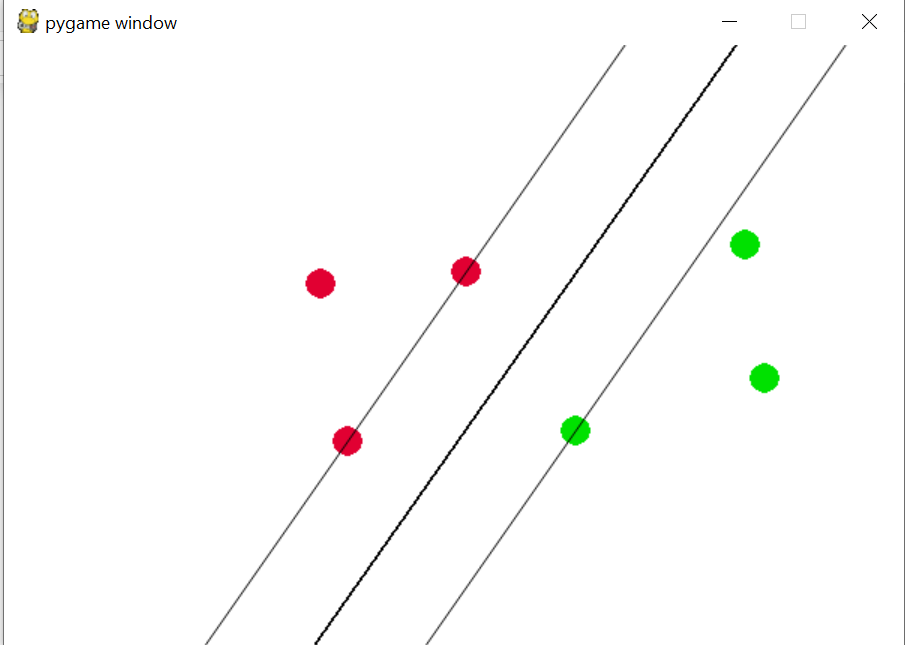

In [23]:
from IPython.display import Image
Image("picture.png")